<a href="https://colab.research.google.com/github/AlexKressner/KI_Logistik_Python/blob/main/L%C3%B6sung_G1_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Übersicht
1. [Erste Visualisierungsformen](#erste_visualisierungen)
  1. [Histogramm](#einführung_hist)
  1. [Säulendiagramm](#einführung_bar)
  1. [Liniendiagramm](#einführung_line)
1. [Weitere nützliche Funktionen](#weitere_funktionen)

# Übungsaufgaben
- [Visualisierung - Verkaufszahlen Walmart](#walmart)

# Setup
Für die Visualisierung nutzen wir das Package `matplotlib` und die Funktionalitäten rundum `pyplot`. Dazu importieren wir zunächst das Package (ggf. müssen Sie dieses noch mithilfe von `pip3 install matplotlib` installieren). Es ist üblich `matplotlib.pyplot` als `plt` zu importieren.

In [ ]:
import matplotlib.pyplot as plt

Zusätzlich müssen wir erneut das Package `pandas` laden.

In [ ]:
import pandas as pd

## 1 Erste Visualisierungsformen <a class="anchor" id="erste_visualisierungen"></a>
Wir laden erneut den [Fifa World Cup](https://www.kaggle.com/datasets/abecklas/fifa-world-cup) Datensatzes aus einer csv-Datei. Anschließend wenden wir die `.plot()` Methode auf diesen DataFrame an. Über das Argument `kind` kann z.B. gesteuert werden, welche Art von Diagramm erzeugt wird. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/WorldCupMatches.txt")
data = data.astype({"Datetime": "M", "RoundID": "O", "MatchID": "O"}, errors='raise') 
data.dropna(inplace=True)

In [ ]:
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### 1.1 Histogramm <a class="anchor" id="einführung_hist"></a>
Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung kardinal skalierter Merkmale. Es erfordert die Einteilung der Daten in Klassen (englisch bins), die eine konstante oder variable Breite haben können. Es werden direkt nebeneinanderliegende Rechtecke von der Breite der jeweiligen Klasse gezeichnet, deren Flächeninhalte die (relativen oder absoluten) Klassenhäufigkeiten darstellen. Die Höhe jedes Rechtecks stellt dann die (relative oder absolute) Häufigkeitsdichte dar, also die (relative oder absolute) Häufigkeit dividiert durch die Breite der entsprechenden Klasse. (Quelle: Wikipedia)

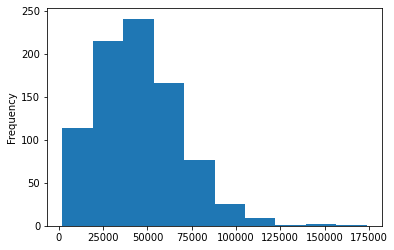

In [ ]:
# Muster
# 1. Schritt: Welche Daten sollen abgebildet werden --> Anzahl der Zuschauer --> ["Attendance"]
# 2. Schritt: Wie soll abgebildet werden --> plot(kind="hist")
data["Attendance"].plot(kind="hist")
plt.show()

Mit dem Argument `bins` geben Sie an, in wie viele verschiedene Klassen die Daten eingeteilt werden. **Frage:** Was ist der Default-Wert für `bins`, d.h. wenn kein Argument beim Aufruf der Methode `.plot()` übergeben wird?

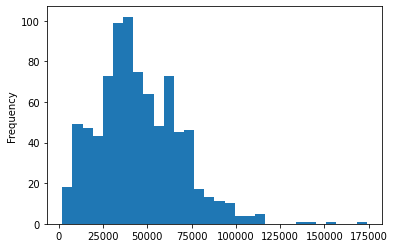

In [ ]:
data["Attendance"].plot(kind="hist", bins=30)
plt.show()

Über Argumente wie `color` oder `edgecolor` lässt sich die farbliche Darstellung einer Grafik steuern. Eine Übersicht zu den verfügbaren Grafiken finden Sie [hier](https://matplotlib.org/stable/gallery/color/named_colors.html).

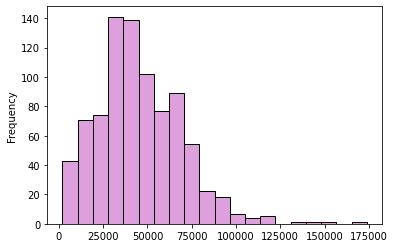

In [ ]:
data["Attendance"].plot(kind="hist", 
                        bins=20,
                        color="plum",
                        edgecolor='k',
                        )
plt.show()

Ein Übersicht zu den Standardargumenten zur Übergabe an die Funktion `plot()` finden Sie in der Online-Dokumentation von `pandas` unter folgendem [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Das folgende Beispiel zeigt, wie Sie mehrere Histogramm für einzelne Spalten gleichzeitig erstellen. Zunächst wählen Sie die relevanten Spalten des DataFrames `data` aus, d.h. `[["Half-time Home Goals", "Half-time Away Goals"]]` und rufen im Anschluss direkt die Funktion zur Erstellung eines Histogramms auf `hist()`. Zu letzterer finden Sie die Dokumentation [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

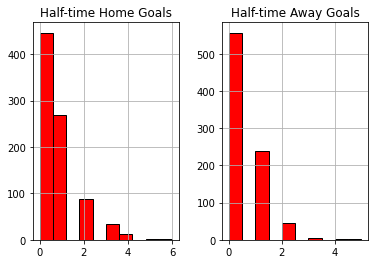

In [ ]:
data[["Half-time Home Goals", "Half-time Away Goals"]].hist(bins=10, color="r", edgecolor="k")
plt.show()

### 1.2 Säulendiagramm <a class="anchor" id="einführung_bar"></a>
Das Säulendiagramm, bei schmalen Säulen auch Stabdiagramm genannt, ist ein Diagramm zur vergleichenden Darstellung, das durch auf der x-Achse senkrecht stehende, nicht aneinandergrenzende Säulen (Rechtecke mit bedeutungsloser Breite) die Häufigkeitsverteilung einer diskreten (Zufalls-)Variablen veranschaulicht. Das Säulendiagramm eignet sich besonders, um wenige Ausprägungen (bis ca. 15) zu veranschaulichen.(Quelle: Wikipedia)

In [ ]:
mean_attendance_by_year = data.groupby("Year")["Attendance"].mean()
mean_attendance_by_year

Year
1930.0    32808.277778
1934.0    21352.941176
1938.0    20872.222222
1950.0    47511.181818
1954.0    29561.807692
1958.0    23423.142857
1962.0    27911.625000
1966.0    48847.968750
1970.0    50124.218750
1974.0    49098.763158
1978.0    40678.710526
1982.0    40571.596154
1986.0    46039.057692
1990.0    48388.750000
1994.0    68991.115385
1998.0    43517.187500
2002.0    42268.703125
2006.0    52491.234375
2010.0    49669.625000
2014.0    55374.910256
Name: Attendance, dtype: float64

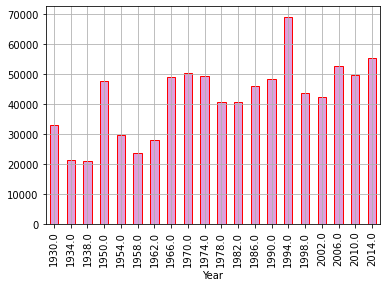

In [ ]:
mean_attendance_by_year.plot(kind="bar", grid=True, color="plum", edgecolor="r")
plt.show()

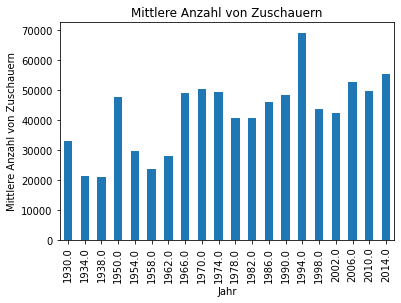

In [ ]:
mean_attendance_by_year.plot(kind="bar", 
                             title="Mittlere Anzahl von Zuschauern",
                             xlabel="Jahr",
                             ylabel="Mittlere Anzahl von Zuschauern",
                             grid=False
                            )
plt.show()

### 1.3 Liniendiagramm <a class="anchor" id="einführung_line"></a>
Ein Liniendiagramm, auch Kurvendiagramm, ist die graphische Darstellung des funktionellen Zusammenhangs zweier (bei zweidimensionaler Darstellung) oder dreier (bei dreidimensionaler Darstellung) Merkmale als Diagramm in Linienform, wodurch Veränderungen bzw. Entwicklungen (etwa innerhalb eines bestimmten Zeitabschnitts) dargestellt werden können. (Quelle: Wikipedia)

**Frage:** Wie ist das Ergebnis der nachfolgenden Code-Zelle zu verstehen?

In [ ]:
spiele = data.groupby("Year").size()
spiele

Year
1930.0    18
1934.0    17
1938.0    18
1950.0    22
1954.0    26
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1974.0    38
1978.0    38
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    78
dtype: int64

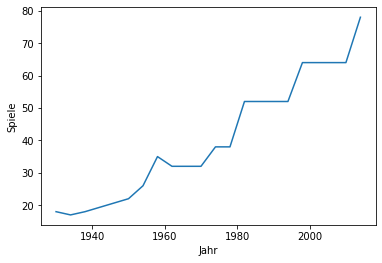

In [ ]:
spiele.plot(kind="line",
            xlabel="Jahr",
            ylabel="Spiele"
            )
plt.show()

Liniendiagramm mit Rotation der x-Achse um 45 Grad (`rot=45`) und Anzeige sämtlicher Jahre, in denen Weltmeisterschaften gespielt wurden. Für letzteres nutzen Sie den Parameter `xticks`. Dieser erwartet eine Liste, die alle auf der x-Achse anzuzeigenden Elemente enthält. Mit dem Aufruf `data.Year.unique()` erhalten wir genau eine Liste, die alle Jahre an denen Weltmeisterschaften gespielt wurde.

In [ ]:
data.Year.unique()

array([1930., 1934., 1938., 1950., 1954., 1958., 1962., 1966., 1970.,
       1974., 1978., 1982., 1986., 1990., 1994., 1998., 2002., 2006.,
       2010., 2014.])

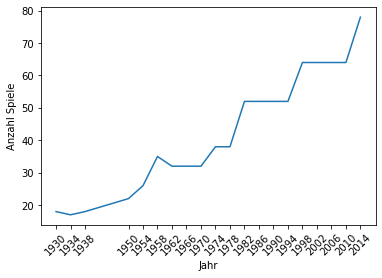

In [ ]:
spiele.plot(kind="line",
            xlabel="Jahr",
            ylabel="Anzahl Spiele",
            rot=45,
            xticks=data.Year.unique(),
            legend=False,
            )
plt.show()

Weitere hilfreiche Argumente zur Steuerung der Darstellung finden Sie in der nachfolgenden Code-Zeile. Übersicht zu [Markern](https://matplotlib.org/stable/api/markers_api.html) und [Linestyles](
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

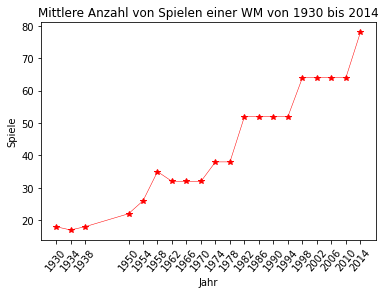

In [ ]:
spiele.plot(kind="line",
            title="Mittlere Anzahl von Spielen einer WM von 1930 bis 2014",
            xlabel="Jahr",
            ylabel="Spiele",
            rot=50,
            xticks=data.Year.unique(),
            legend=False,
            grid=False,
            color="r",
            linestyle="solid",
            linewidth=0.5,
            marker="*"
            )
plt.show()

## 2 Weitere nützliche Funktionalitäten <a class="anchor" id="weitere_funktionen"></a>



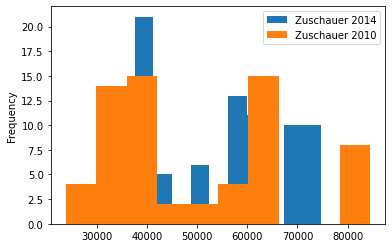

In [ ]:
# Mehrere Grafikelemente in einer Abbildung
# 1. Grafikelemet
data[data.Year==2014]["Attendance"].plot(kind="hist")
# 2. Grafikelement
data[data.Year==2010]["Attendance"].plot(kind="hist")

plt.legend(["Zuschauer 2014","Zuschauer 2010"])
plt.show()

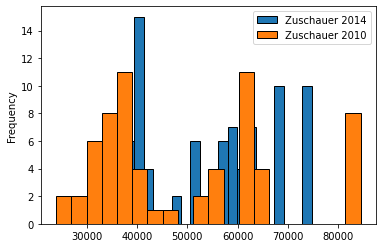

In [ ]:
# Transparenz
data[data.Year==2014]["Attendance"].plot(kind="hist", alpha=1, bins=20, edgecolor="k")
data[data.Year==2010]["Attendance"].plot(kind="hist", alpha=1, bins=20, edgecolor="k")
plt.legend(["Zuschauer 2014","Zuschauer 2010"])
plt.show()

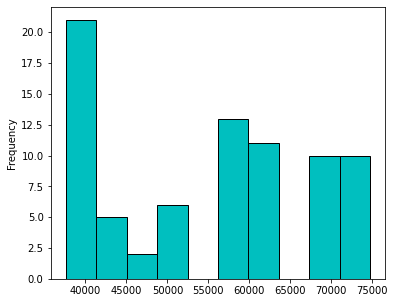

In [ ]:
# Veränderung der Diagrammgröße
data[data.Year==2014]["Attendance"].plot(kind="hist", 
                                         figsize=(6,5),
                                         color="c",
                                         edgecolor="k",
                                         )
plt.show()

### Aufgabe: Visualisierungen - Verkaufszahlen Walmart <a class="anchor" id="walmart"></a>

Sie erhalten einen Datensatz der Einzelhandelskette Walmart (Auszug aus diesem [Datensatz](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data)). Dieser enthält Verkaufszahlen für jeden Laden (`store`) mit seinen verschiedenen Kategorien (`department`), z.B. Gemüse oder Tiefkühlware. Die wöchentlichen Verkaufszahlen (`weekly_sales`) sind in Dollar angegeben. Der jeweilige Freitag einer Woche ist über die Spalte `date` gekennzeichnet. Die Spalten `is_holiday`, `temperature_c`, `fuel_price_usd_per_l`und `unemployment` enthalten weitere Informationen, die für diese Woche aufgenommen wurden und vermutlich einen Einfluss auf die Verkaufszahlen haben. Wir laden zunächst wieder die Daten:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KI_LOG_mit_PYTHON/sales_data.txt", index_col=0)
# Löschen der Spalte "type". "inplace=True" ist gleichbedeutend mit "df = df.drop(columns=["type"])"
df.drop(columns=["type"], inplace=True)
# Transformation der Datentypen
df = df.astype({"store":"O", "department":"O", "date":"M"})
df.head()

,store,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


Bitte berarbeiten Sie nun die folgenden Aufgaben:
1. Erstellen Sie ein Histogramm, welches die gesamten wöchentlichen Verkaufszahlen zeigt!
1. In den Daten sehen Sie auch den Kraftstoffpreis (Dollar/l). Dieser wird individuell je Store und Woche berechnet und ergibt sich aus den Kraftstoffpreise naheliegender Tankstellen. Ermitteln Sie den durchschnittlichen wöchentlichen Kraftstoffpreis (Dollar/l) über alle Stores und tragen Sie diesen in einem Liniendiagramm ab (x-Achse: Wochen mit aufsteigender Sortierung, y-Achse: Kraftstoffpreis). Sie müssen dazu auf die Methode `groupby()` zurückgreifen. Schauen Sie sich bitte auch nochmals die Verwendung der `reset_index()` Methode an, die wir bei der Erstellung von [Liniendiagrammen](#einführung_line) benutzt haben.
1. Vergleichen Sie die wöchentlichen Verkaufszahlen von Store 14 und 19 mit zwei Histogrammen. Passen Sie bitte die Größe des Diagramm für eine bessere Lesbarkeit an!
1. Welcher Store hatte im Betrachtungszeitraum die besten Verkaufszahlen?
1. Stellen Sie für diesen Store die durchschnittlichen Verkaufzahlen für die 10 umsatzstärksten Abteilungen (`department`) in einem Säulendiagramm dar!

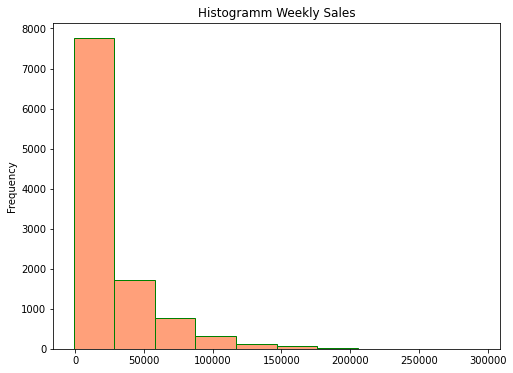

In [ ]:
# Aufgabe1
df["weekly_sales"].plot(
    kind="hist",
    figsize=(8,6),
    color="lightsalmon",
    edgecolor="green",
    title="Histogramm Weekly Sales"
)
plt.show()

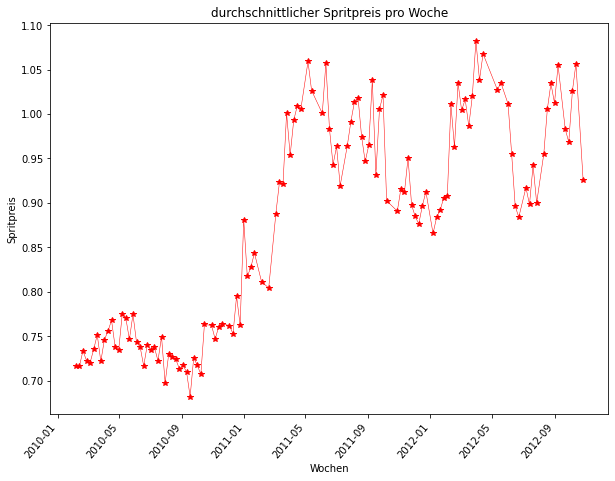

In [ ]:
# Aufgabe2
spritpreise = df.groupby("date")["fuel_price_usd_per_l"].mean()
spritpreise.plot(
            kind="line",
            title="durchschnittlicher Spritpreis pro Woche",
            xlabel="Wochen",
            ylabel="Spritpreis",
            rot=50,
            legend=False,
            grid=False,
            color="r",
            linestyle="solid",
            linewidth=0.5,
            marker="*",
            figsize=(10,8)
            )
plt.show()

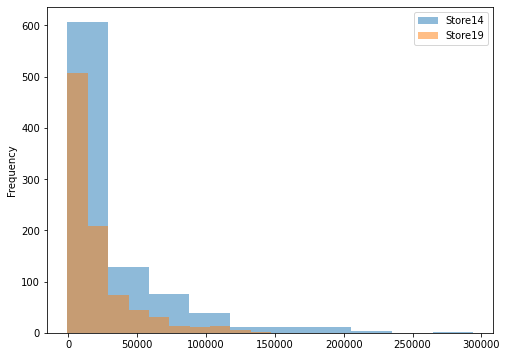

In [ ]:
# Aufgabe3
df[df.store==14]["weekly_sales"].plot(
    kind="hist", 
    figsize=(8,6),
    alpha=0.5
    )
df[df.store==19]["weekly_sales"].plot(
    kind="hist",
    figsize=(8,6),
    alpha=0.5
    )
plt.legend(["Store14","Store19"])
plt.show()

In [ ]:
# Aufgabe4
df.groupby("store")["weekly_sales"].sum().sort_values(ascending=False).head(1)

store
14    26889842.67
Name: weekly_sales, dtype: float64

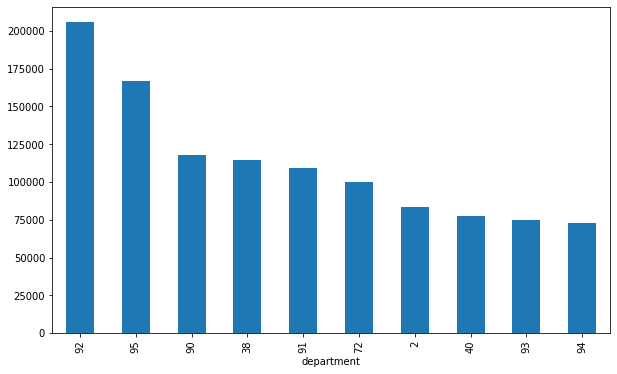

In [ ]:
# Aufgabe5
top10 = df[df.store==14].groupby("department")["weekly_sales"].mean().sort_values(ascending=False).head(10)
top10.plot(
    kind="bar", 
    figsize=(10,6)
    )
plt.show()